<a href="https://colab.research.google.com/github/lushi-tech/Python/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


Step 2: Create the custom dataset with make_blobs and plot it

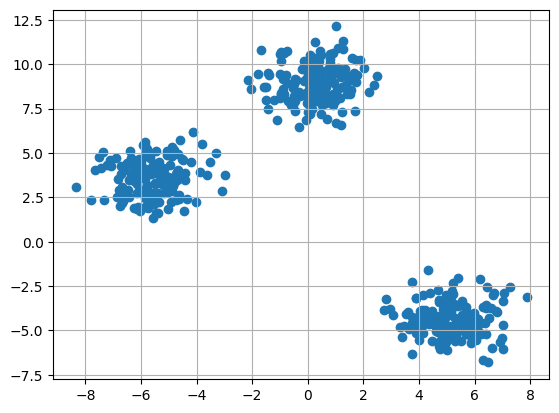

In [2]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


# Step 3: Initialize the random centroids


The code initializes three clusters for K-means clustering. It sets a random seed and generates random cluster centers within a specified range, and creates an empty list of points for each cluster.

In [3]:
k = 3
clusters = {}
np.random.seed(23)

# Initialize clusters
for idx in range(k):
    center = X[np.random.choice(X.shape[0])]  # Use random points from the dataset as initial centers
    cluster = {'center': center, 'points': []}
    clusters[idx] = cluster

Step 4: Plot the random initialize center with data points

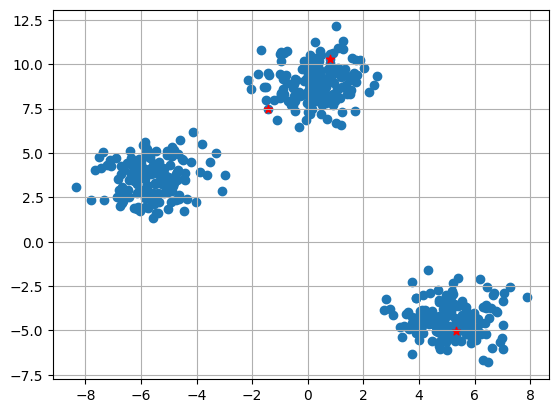

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


The plot displays a scatter plot of data points (X[:,0], X[:,1]) with grid lines. It also marks the initial cluster centers (red stars) generated for K-means clustering.

Step 5: Define Euclidean distance

In [5]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))


Step 6: Create the function to Assign and Update the cluster center

This step assigns data points to the nearest cluster center, and the M-step updates cluster centers based on the mean of assigned points in K-means clustering.

In [6]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters


Step 7: Create the function to Predict the cluster for the datapoints

In [7]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred


Step 8: Assign, Update, and predict the cluster center

In [8]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)


Step 9: Plot the data points with their predicted cluster center

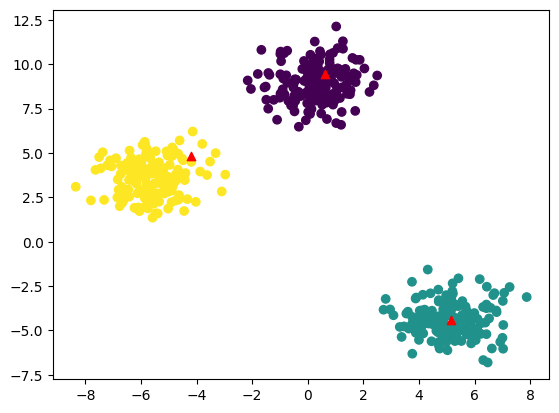

In [9]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()


The plot shows data points colored by their predicted clusters. The red markers represent the updated cluster centers after the E-M steps in the K-means clustering algorithm.